In [1]:
from sklearn import tree
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
data = pd.read_csv("data/preprocessed_cancer.csv")

In [3]:
data

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,56,0,0,0,1,1,1,0,0,1,1,1,1,0,1
305,70,1,0,0,0,0,1,1,1,1,1,1,0,1,1
306,58,1,0,0,0,0,0,1,1,1,1,0,0,1,1
307,67,1,0,1,0,0,1,1,0,1,1,1,0,1,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   AGE                    309 non-null    int64
 1   SMOKING                309 non-null    int64
 2   YELLOW_FINGERS         309 non-null    int64
 3   ANXIETY                309 non-null    int64
 4   PEER_PRESSURE          309 non-null    int64
 5   CHRONIC DISEASE        309 non-null    int64
 6   FATIGUE                309 non-null    int64
 7   ALLERGY                309 non-null    int64
 8   WHEEZING               309 non-null    int64
 9   ALCOHOL CONSUMING      309 non-null    int64
 10  COUGHING               309 non-null    int64
 11  SHORTNESS OF BREATH    309 non-null    int64
 12  SWALLOWING DIFFICULTY  309 non-null    int64
 13  CHEST PAIN             309 non-null    int64
 14  LUNG_CANCER            309 non-null    int64
dtypes: int64(15)
memory usage: 36.3 KB


In [5]:
data.isnull().sum()

AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [6]:
X = data.drop("LUNG_CANCER", axis=1)
y = data["LUNG_CANCER"]


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle=True, random_state=2)

In [7]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_predictions = lr.predict(X_test)
lr_acc = accuracy_score(y_test, lr_predictions)
print(f"Logistic Regression Accuracy Score: {lr_acc}")

Logistic Regression Accuracy Score: 0.8709677419354839


/usr/local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt_predictions = dt.predict(X_test)
dt_acc = accuracy_score(y_test, dt_predictions)
print(f"Decision Tree Accuracy Score: {dt_acc}")

Decision Tree Accuracy Score: 0.8870967741935484


In [9]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Accuracy Score: {rf_acc}")

Random Forest Accuracy Score: 0.9032258064516129


# Decision Tree Plotting

In [10]:
from sklearn import tree
from matplotlib import pyplot as plt

In [11]:
# is this the same as before, but this time limiting the tree depth?
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train,y_train)
dt_predictions = dt.predict(X_test)
dt_acc = accuracy_score(y_test, dt_predictions)
print(f"Decision Tree Accuracy Score: {dt_acc}")

Decision Tree Accuracy Score: 0.8709677419354839


In [12]:
data["LUNG_CANCER"].value_counts()

LUNG_CANCER
1    270
0     39
Name: count, dtype: int64

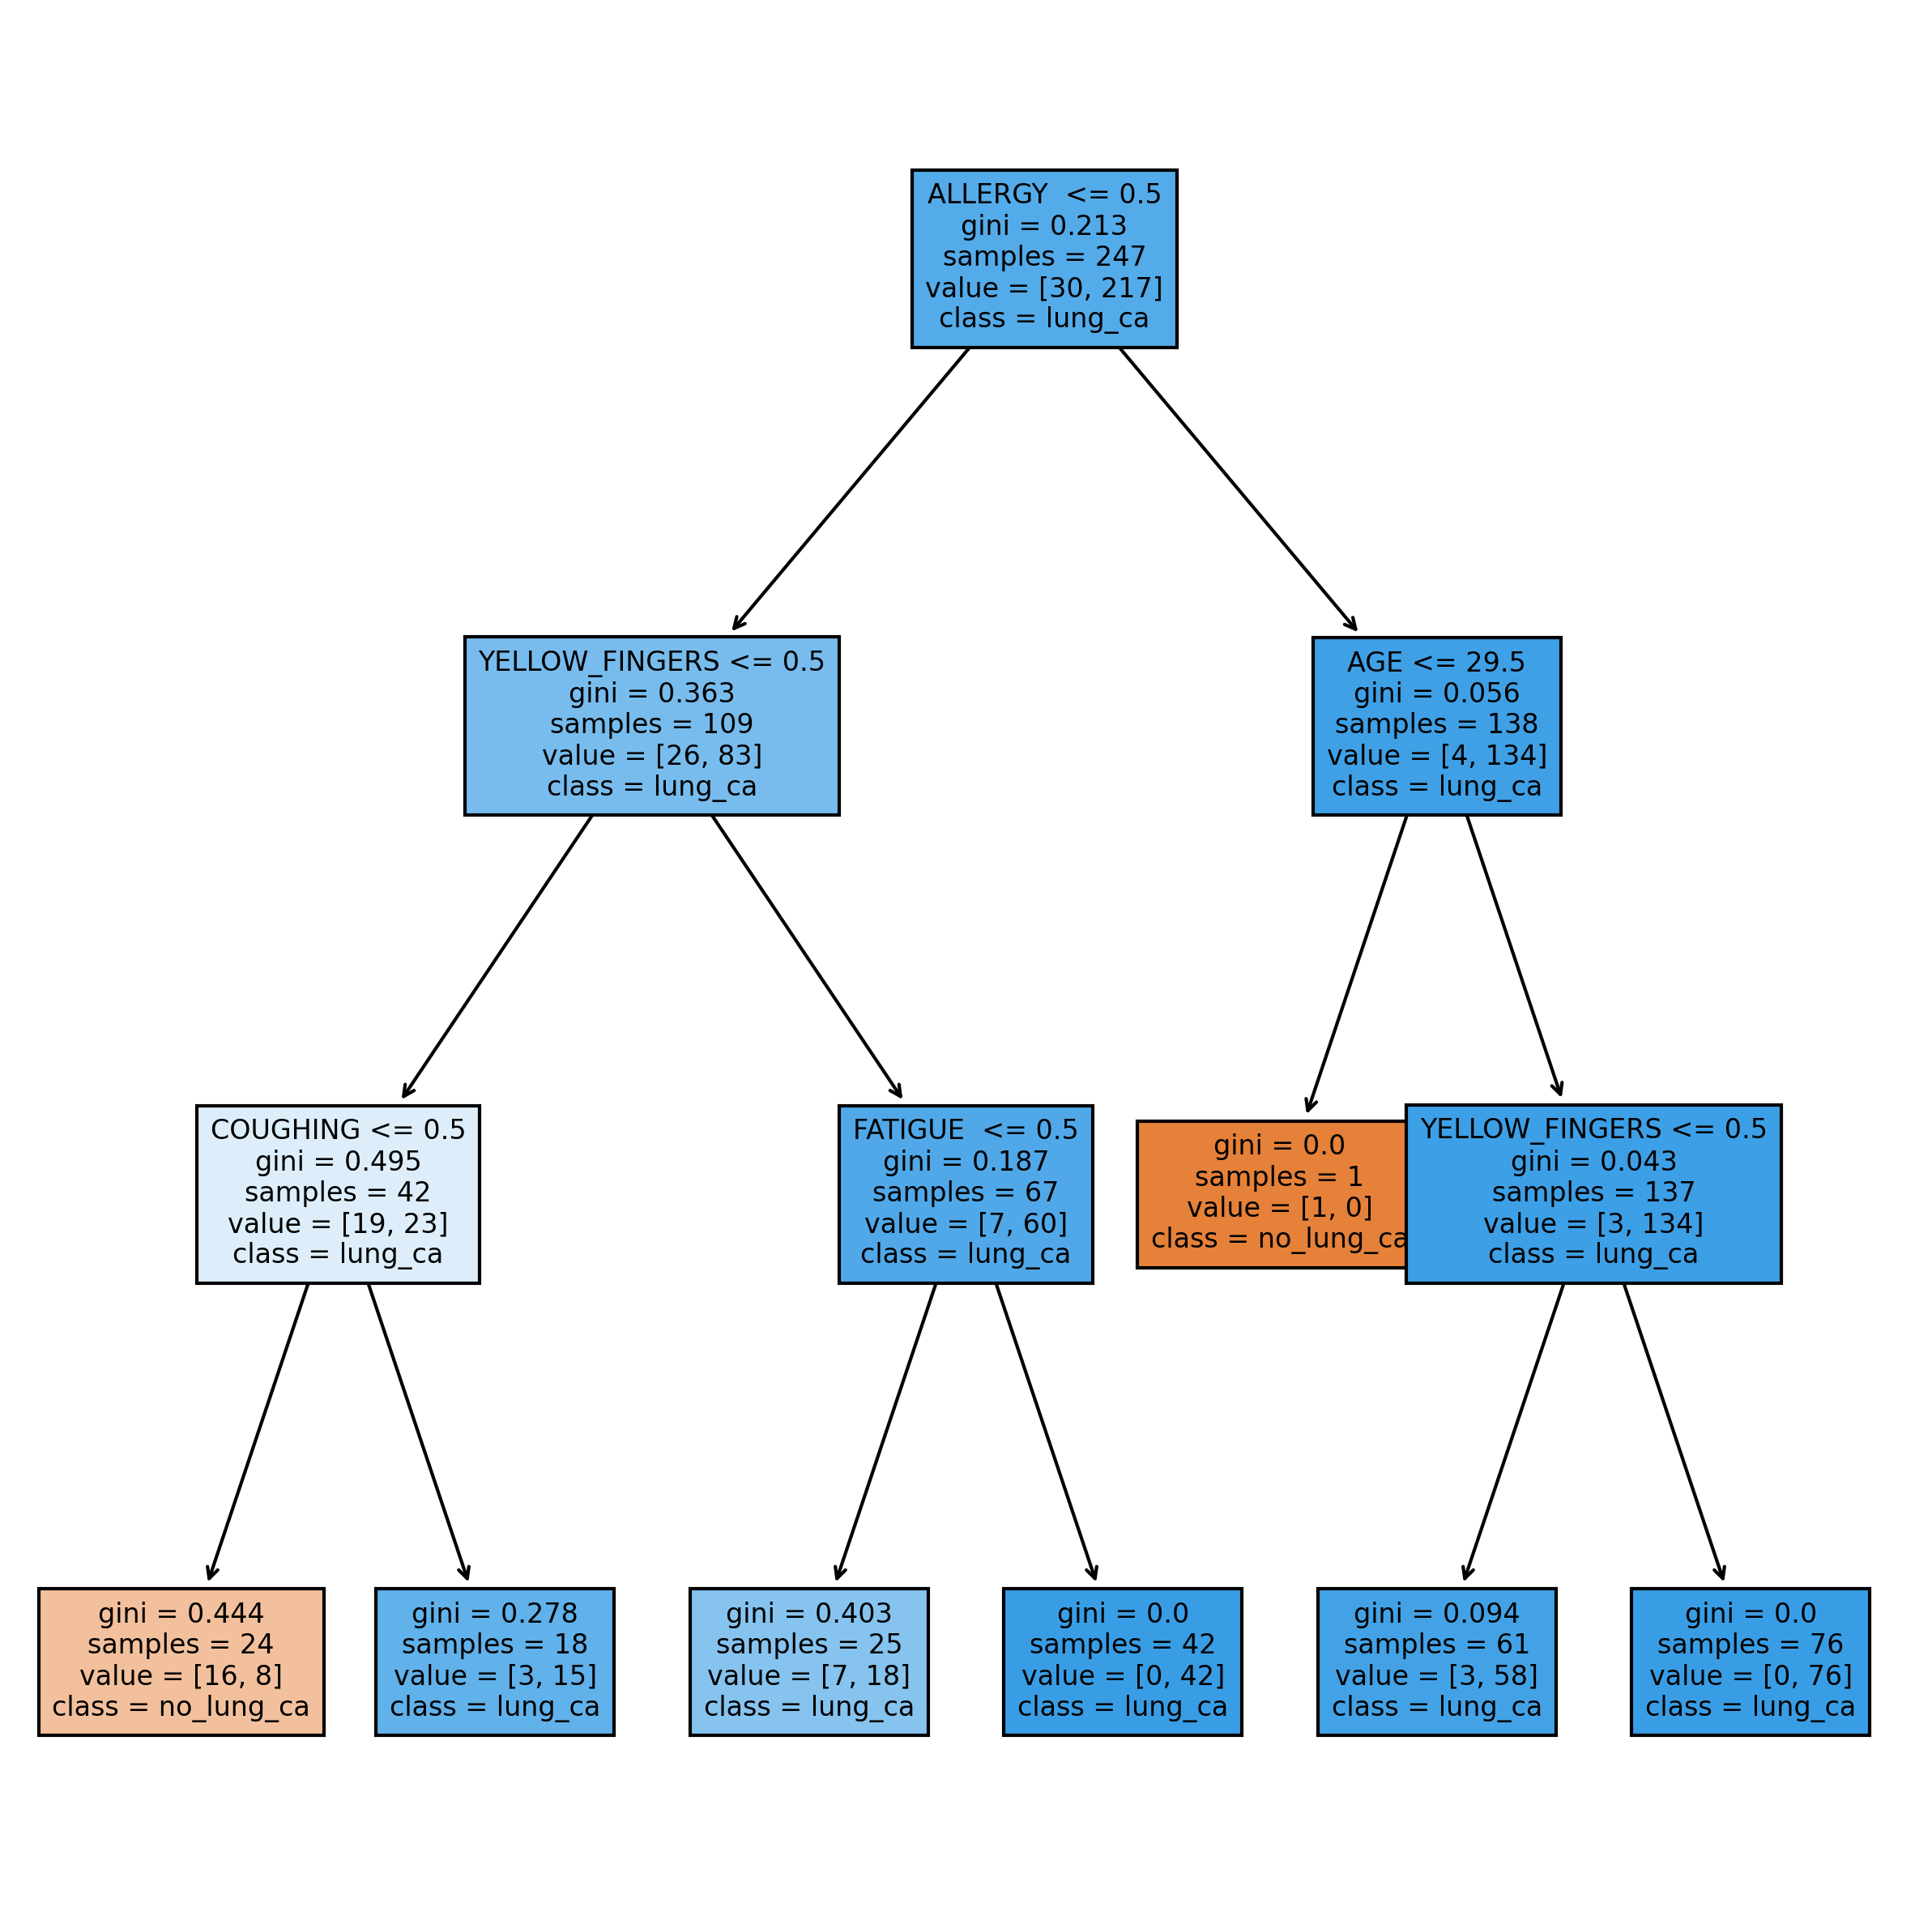

In [13]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=300)
tree.plot_tree(
    dt, 
    feature_names=X_train.columns, 
    # should this class be no lung cancer / lung cancer? - I corrected this
    class_names=["no_lung_ca","lung_ca"],
    filled=True,
    fontsize=8
)
plt.show()

# Random Forest Feature Importance

In [99]:
rf.feature_importances_

array([0.23889583, 0.04074939, 0.07569306, 0.05311119, 0.07146584,
       0.05528324, 0.05769058, 0.08117422, 0.05606112, 0.0816754 ,
       0.04424532, 0.03247071, 0.05656476, 0.05491934])

In [102]:
X_train.columns

Index(['AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE',
       'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN'],
      dtype='object')

In [107]:
feature_importances = pd.DataFrame(
    rf.feature_importances_, 
    index =X_train.columns,  
    columns=['importance']
).sort_values('importance', ascending=False)

In [108]:
feature_importances

,importance
AGE,0.238896
ALCOHOL CONSUMING,0.081675
ALLERGY,0.081174
YELLOW_FINGERS,0.075693
PEER_PRESSURE,0.071466
FATIGUE,0.057691
SWALLOWING DIFFICULTY,0.056565
WHEEZING,0.056061
CHRONIC DISEASE,0.055283
CHEST PAIN,0.054919
